<a href="https://colab.research.google.com/github/Soumi7/Table_Data_Extraction/blob/main/medium_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading original image to display

In [2]:
import numpy as np

In [3]:
import os
os.chdir('C:\\Users\\Tanmay.Pal\\Downloads\\Table_Data_Extraction-main\\images')

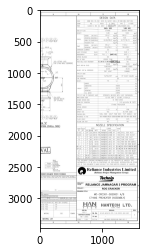

In [4]:
import cv2
import matplotlib.pyplot as plt
file=r'C:\\Users\\Tanmay.Pal\\Downloads\\Table_Data_Extraction-main\\img.jpg'
img = cv2.imread(file,0)
#kernel = np.ones((5,5), np.uint8)
#img=cv2.erode(img,kernel)
#cv2.imwrite('erode.png',img)
#img=cv2.dilate(img,np.ones((3,3),np.uint8))
plot1 = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Inverted Image with global thresh holding

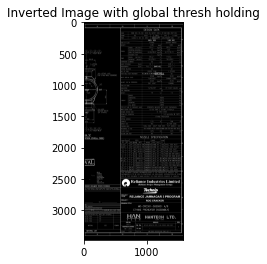

In [6]:
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
#img_bin=cv2.erode(img_bin.np)
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.title("Inverted Image with global thresh holding")
plt.show()

## Inverted Image with otsu thresh holding

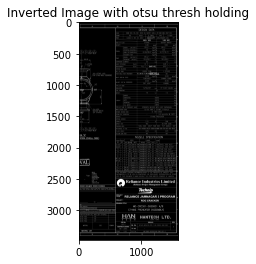

In [7]:
img_bin1 = 255-img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin1_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

## Inverted image with both global and Otsu thresholding

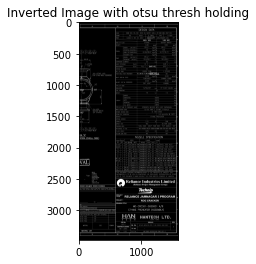

In [8]:
img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

## Create a rectangular structuring element

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
print(kernel)

[[1 1]
 [1 1]]


# Morphological Operations

## Create a new structuring element to perform erosion on the image

First we need to get the vertical lines.

We create a vertical kernel with kernel width 1 and height the number of columns in image array divided by 200.

Erosion makes the pixel 1 only if all the pixels under kernel are 1.

We perform erosion for 5 iterations with the vertical kernel.

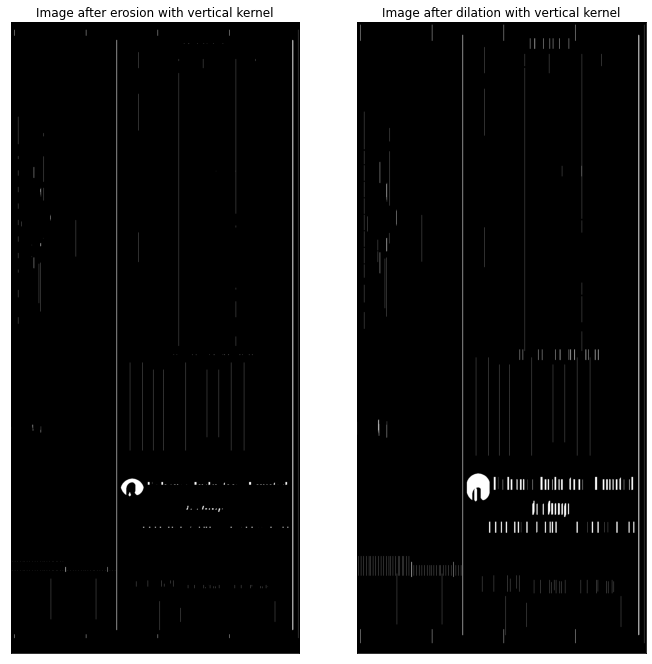

In [10]:
import numpy as np
plt.figure(figsize= (30,30))

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//100))
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=2)
plt.subplot(151),plt.imshow(eroded_image, cmap = 'gray')
plt.title('Image after erosion with vertical kernel'), plt.xticks([]), plt.yticks([])

vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=4)
plt.subplot(152),plt.imshow(vertical_lines, cmap = 'gray')
plt.title('Image after dilation with vertical kernel'), plt.xticks([]), plt.yticks([])

plt.show()

Dilation will make the pixel 1, if at least one of the pixels under the kernel is 1.

Similarly lets do the same with a horizontal lines to get the horizontal lines.

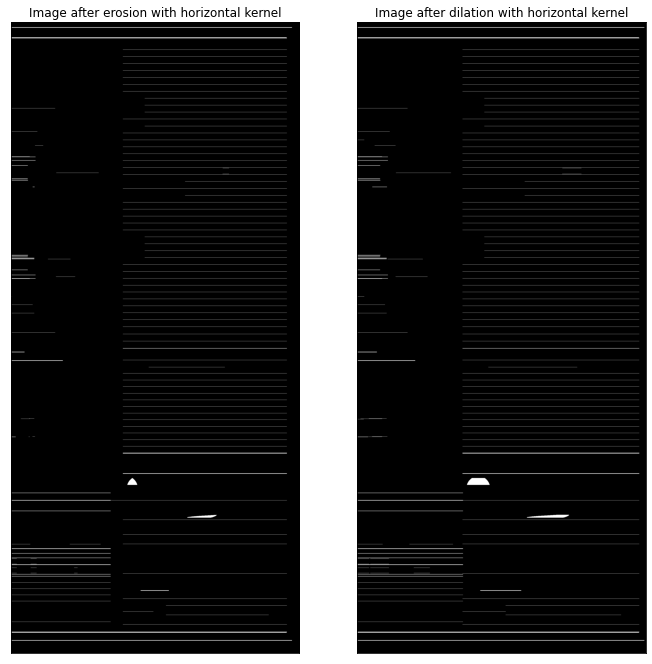

In [12]:
plt.figure(figsize= (30,30))

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
horizontal_lines = cv2.erode(img_bin, hor_kernel, iterations=5)
plt.subplot(153),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after erosion with horizontal kernel'), plt.xticks([]), plt.yticks([])

horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=5)
plt.subplot(154),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after dilation with horizontal kernel'), plt.xticks([]), plt.yticks([])

plt.show()

## Now we add the two images

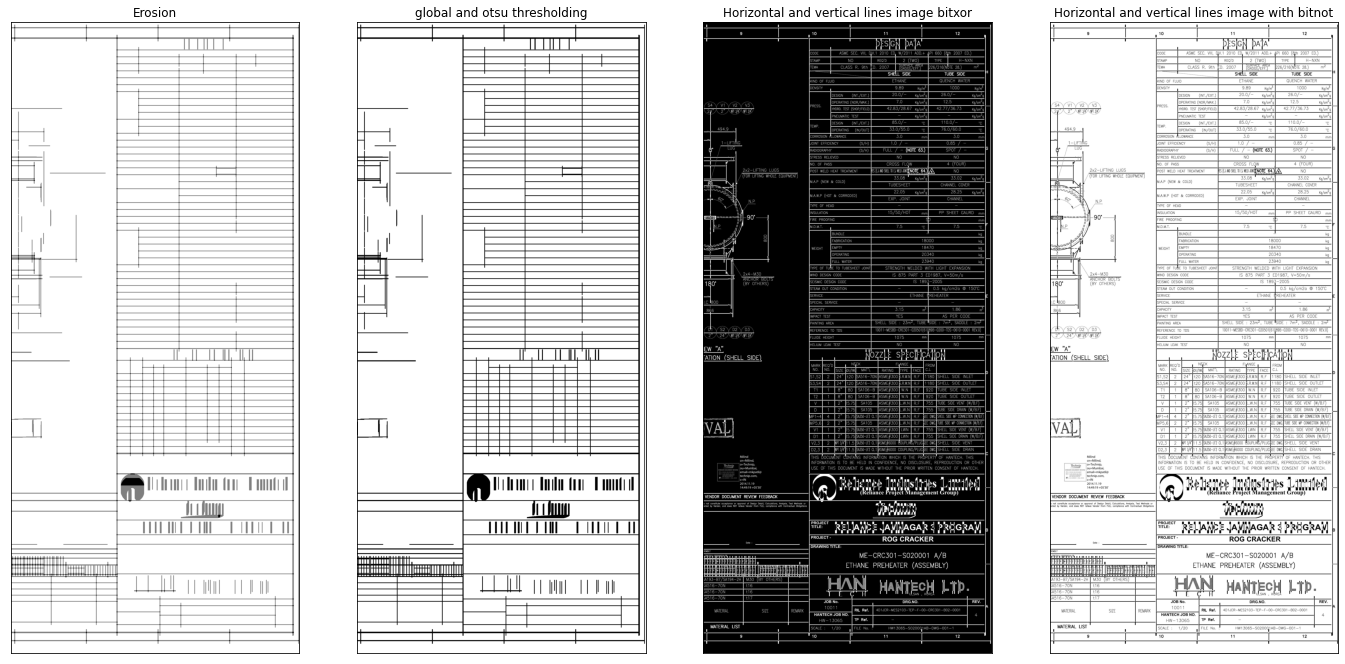

In [13]:
plt.figure(figsize= (30,30))

vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)
plt.subplot(151),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('Erosion'), plt.xticks([]), plt.yticks([])

thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.subplot(152),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('global and otsu thresholding'), plt.xticks([]), plt.yticks([])

bitxor = cv2.bitwise_xor(img,vertical_horizontal_lines)
plt.subplot(153),plt.imshow(bitxor, cmap = 'gray')
plt.title('Horizontal and vertical lines image bitxor'), plt.xticks([]), plt.yticks([])

bitnot = cv2.bitwise_not(bitxor)
plt.subplot(154),plt.imshow(bitnot, cmap = 'gray')
plt.title('Horizontal and vertical lines image with bitnot'), plt.xticks([]), plt.yticks([])

plt.show()

In [496]:
#!pip install pytesseract
#!sudo apt install tesseract-ocr

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
import pytesseract

## Let's get the contours from the grid that we have obtained by adding the horizontal and vertical lines.

In [15]:
contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

## Bounding Boxes

To get the coordinates of different boxes

In [16]:
boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))

Here we draw the contours on our image and also store them in list boxes. It is stored as a list (x,y,w,h) : x and y beind coordinates of top left corner and w and h being width and height of the box respectively.

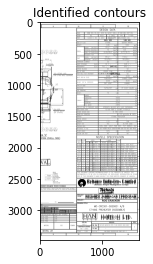

In [17]:
boxes = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        boxes.append([x,y,w,h])
    
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

## Getting the rows and columns

## To store rows and columns :

- Now we add rows and columns.
- We calculate the mean height of all boxes.
- Initially, we append the first box to the columns list.
- The columns list is essentialy a temporary list.
- We assign previous box to the first box as well.
- We will loop through the remaining boundingBoxes list.
- At each iteration, we check if the y coordinate of the top left corner of the current box is less than the y coordinate of the previous box added with half the mean of all heights.
- If yes :
    - The current box is appended to columns list.
    - The current box is assigned to previous box.
    - Next we check if we are at the last index. If yes :
      - We append the entire column to rows list.
- If no :
    - We append the columns list to rows.
    - We assign the columns list to empty as this will start a new empty columns list.
    - We assign the current box to the previous box variable.
    - We append the current box to the empty column list we just created.


In [18]:
rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
    if(boxes[i][1]<=previous[1]+mean/10):
        print("iffffff",i)
        print(boxes[i],previous[1])
        columns.append(boxes[i])
        previous=boxes[i]
        if(i==len(boxes)-1):
            rows.append(columns)
    else:
        print("else",i)
        print(boxes[i],previous[1])
       #print(boxes[i])
        #print("11111111111111111111111111111111111")
        rows.append(columns)
        columns=[]
        previous = boxes[i]
        columns.append(boxes[i])
#print("Rows")
#for row in rows:
 #   print(row)

55.86243386243386
iffffff 1
[417, 40, 389, 50] 40
iffffff 2
[23, 40, 389, 50] 40
iffffff 3
[0, 40, 18, 50] 40
else 4
[586, 98, 961, 59] 40
else 5
[704, 161, 843, 34] 98
iffffff 6
[586, 161, 114, 34] 161
else 7
[1348, 199, 199, 34] 161
iffffff 8
[1240, 199, 104, 34] 199
iffffff 9
[1060, 199, 176, 34] 199
iffffff 10
[926, 199, 130, 34] 199
iffffff 11
[704, 199, 218, 34] 199
iffffff 12
[586, 199, 114, 34] 199
else 13
[1240, 237, 307, 35] 199
iffffff 14
[1060, 237, 176, 35] 237
iffffff 15
[704, 237, 352, 35] 237
iffffff 16
[586, 237, 114, 35] 237
else 17
[1240, 276, 307, 34] 237
iffffff 18
[926, 276, 310, 34] 276
iffffff 19
[586, 276, 336, 34] 276
else 20
[1240, 314, 307, 34] 276
iffffff 21
[926, 314, 310, 34] 314
iffffff 22
[586, 314, 336, 34] 314
else 23
[1240, 352, 307, 34] 314
iffffff 24
[926, 352, 310, 34] 352
iffffff 25
[586, 352, 336, 34] 352
else 26
[1240, 390, 307, 34] 352
iffffff 27
[926, 390, 310, 34] 390
iffffff 28
[704, 390, 218, 34] 390
iffffff 29
[586, 390, 114, 148] 390
els

In [709]:
rows

[[[811, 40, 389, 50], [417, 40, 389, 50], [23, 40, 389, 50], [0, 40, 18, 50]],
 [[586, 98, 961, 59]],
 [[704, 161, 843, 34], [586, 161, 114, 34]],
 [[1240, 199, 307, 34],
  [1060, 199, 176, 34],
  [704, 199, 352, 34],
  [586, 199, 114, 34]],
 [[1240, 237, 307, 35],
  [1060, 237, 176, 35],
  [704, 237, 352, 35],
  [586, 237, 114, 35]],
 [[1240, 276, 307, 34], [926, 276, 310, 34], [586, 276, 336, 34]],
 [[1240, 314, 307, 34], [926, 314, 310, 34], [586, 314, 336, 34]],
 [[1240, 352, 307, 34], [926, 352, 310, 34], [586, 352, 336, 34]],
 [[1240, 390, 307, 34],
  [926, 390, 310, 34],
  [704, 390, 218, 34],
  [586, 390, 114, 148]],
 [[1240, 428, 307, 34], [926, 428, 310, 34], [704, 428, 218, 34]],
 [[1240, 466, 307, 34], [926, 466, 310, 34], [704, 466, 218, 34]],
 [[1240, 504, 307, 34], [926, 504, 310, 34], [704, 504, 218, 34]],
 [[1240, 542, 307, 35],
  [926, 542, 310, 35],
  [704, 542, 218, 35],
  [586, 542, 114, 73]],
 [[1240, 581, 307, 34], [926, 581, 310, 34], [704, 581, 218, 34]],
 [[0,

In [511]:
x,s,d,f=[811, 40, 389, 50]

In [526]:
d=[[[[2],[3],[7]],
  [[8],[9],[0]]],
   [[[1],[0],[9]]]]
d.reverse()
d

[[[[1], [0], [9]]], [[[2], [3], [7]], [[8], [9], [0]]]]

In [25]:
# take second element for sort
def takeSecond(elem):
    return elem[0]

# random list
#random = [(2, 2), (3, 4), (4, 1), (1, 3)]

# sort list with key
#d.sort(key=takeSecond)

# print list
#print('Sorted list:', d)

In [20]:
file=r'C:\\Users\\Tanmay.Pal\\Downloads\\Table_Data_Extraction-main\\img.jpg'
img = cv2.imread(file,0)
img=cv2.erode(img,kernel)

In [ ]:
[[0, 751, 39, 14], [96, 683, 120, 6], [178, 715, 6, 304], [586, 657, 336, 34], [586, 695, 336, 34], [586, 733, 336, 34], [586, 771, 336, 34], [926, 657, 310, 34], [926, 695, 310, 34], [926, 733, 310, 34], [926, 771, 310, 34], [1240, 657, 307, 34], [1240, 695, 307, 34], [1240, 733, 307, 34], [1240, 771, 307, 34]]

In [21]:
a=rows

In [721]:
a

[[[0, 40, 18, 50], [23, 40, 389, 50], [417, 40, 389, 50], [811, 40, 389, 50]],
 [[586, 98, 961, 59]],
 [[586, 161, 114, 34], [704, 161, 843, 34]],
 [[586, 199, 114, 34],
  [704, 199, 352, 34],
  [1060, 199, 176, 34],
  [1240, 199, 307, 34]],
 [[586, 237, 114, 35],
  [704, 237, 352, 35],
  [1060, 237, 176, 35],
  [1240, 237, 307, 35]],
 [[586, 276, 336, 34], [926, 276, 310, 34], [1240, 276, 307, 34]],
 [[586, 314, 336, 34], [926, 314, 310, 34], [1240, 314, 307, 34]],
 [[586, 352, 336, 34], [926, 352, 310, 34], [1240, 352, 307, 34]],
 [[586, 390, 114, 148],
  [704, 390, 218, 34],
  [926, 390, 310, 34],
  [1240, 390, 307, 34]],
 [[704, 428, 218, 34], [926, 428, 310, 34], [1240, 428, 307, 34]],
 [[704, 466, 218, 34], [926, 466, 310, 34], [1240, 466, 307, 34]],
 [[704, 504, 218, 34], [926, 504, 310, 34], [1240, 504, 307, 34]],
 [[586, 542, 114, 73],
  [704, 542, 218, 35],
  [926, 542, 310, 35],
  [1240, 542, 307, 35]],
 [[704, 581, 218, 34], [926, 581, 310, 34], [1240, 581, 307, 34]],
 [[0,

In [22]:
#a={}
c=[]
#b=[]
for i in a:
    i.sort(key=takeSecond)
    #print(i)
    b=[]
    for idx,p in enumerate(i):
        print(p)
        x,y,w,h=p
        roi=img[y:y+h,x:x+w]
        out = pytesseract.image_to_string(roi)
        #b.append(out)
        print(out)
        if(len(out)==0):
            kernel = np.ones((3,3), np.uint8)
            roi=cv2.erode(roi,kernel)
            cv2.imwrite('roi.png',roi)
            out = pytesseract.image_to_string(roi,config='--psm 11')
            #out = pytesseract.image_to_string(roi)
        b.append(out.strip())
    c.append(b)
        #s = s +" "+ out
        #print(s)
        
        
    
    #c.append(b)
        #break
        #for k in p:
            #print(k)
            #break
                   

[0, 40, 18, 50]

[23, 40, 389, 50]

[417, 40, 389, 50]
10

[811, 40, 389, 50]
11

[586, 98, 961, 59]
DESIGN DATA

[586, 161, 114, 34]
CODE

[704, 161, 843, 34]
ASME SEC. Vill, DIV.1 2010 ED. W/2011 ADD.+ API 660 (8th 2007 ED.)

[586, 199, 114, 34]
STAMP

[704, 199, 218, 34]
NO

[926, 199, 130, 34]
REQ'D

[1060, 199, 176, 34]

[1240, 199, 104, 34]
TYPE

[1348, 199, 199, 34]
H—NXN

[586, 237, 114, 35]
TEMA

[704, 237, 352, 35]
CLASS R. 9th ED. 2007

[1060, 237, 176, 35]
CROSS JI AR
GROSS /EFF.

[1240, 237, 307, 35]
226/216(NOTE 28.) = m@

[586, 276, 336, 34]

[926, 276, 310, 34]
SHELL SIDE

[1240, 276, 307, 34]
TUBE SIDE

[586, 314, 336, 34]
KIND OF FLUID

[926, 314, 310, 34]
ETHANE

[1240, 314, 307, 34]
QUENCH WATER

[586, 352, 336, 34]
DENSITY

[926, 352, 310, 34]
9.89

kg/m

[1240, 352, 307, 34]
1000 kg/m?

[586, 390, 114, 148]
PRESS.

[704, 390, 218, 34]
DESIGN _(INT./EXT.)

[926, 390, 310, 34]
20.0/— —Ka/em@g

[1240, 390, 307, 34]
26.0/- Kg/er@q

[704, 

In [23]:
c

[['', '', '10', '11'],
 ['DESIGN DATA'],
 ['CODE',
  'ASME SEC. Vill, DIV.1 2010 ED. W/2011 ADD.+ API 660 (8th 2007 ED.)'],
 ['STAMP', 'NO', "REQ'D", '', 'TYPE', 'H—NXN'],
 ['TEMA',
  'CLASS R. 9th ED. 2007',
  'CROSS JI AR\nGROSS /EFF.',
  '226/216(NOTE 28.) = m@'],
 ['', 'SHELL SIDE', 'TUBE SIDE'],
 ['KIND OF FLUID', 'ETHANE', 'QUENCH WATER'],
 ['DENSITY', '9.89\n\nkg/m', '1000 kg/m?'],
 ['PRESS.', 'DESIGN _(INT./EXT.)', '20.0/— —Ka/em@g', '26.0/- Kg/er@q'],
 ['OPERATING (NOR/MAX.)', '7.0 Kg/em2g', '12.5; Kg/emq'],
 ['HYDRO. TEST (SHOP/FIELD)', '42.83/28.67 Kg/cm@g', '42.77/36.73 —kg/em2g'],
 ['PNEUMATIC TEST', 'Kg/em2g', 'Kg/em2q'],
 ['TEMP.', 'DESIGN _(NT./EXT.)', '85.0/—\n\n*', '110.0/—'],
 ['OPERATING (IN/OUT)', '33.0/55.0\n\nc', '76.0/60.0\n\n°c'],
 [''],
 ['CORROSION ALLOWANCE', '3.0\n\nmm', '3.0\n\nmm'],
 ['JOINT EFFICIENCY (S/H)', '1.0 /-', '0.85 / -'],
 [''],
 ['RADIOGRAPHY (S/H)', 'FULL / — (NOTE 63.)', 'SPOT / -'],
 [''],
 ['STRESS RELIEVED', 'NO', 'NO'],
 [''],
 ['NO. OF 